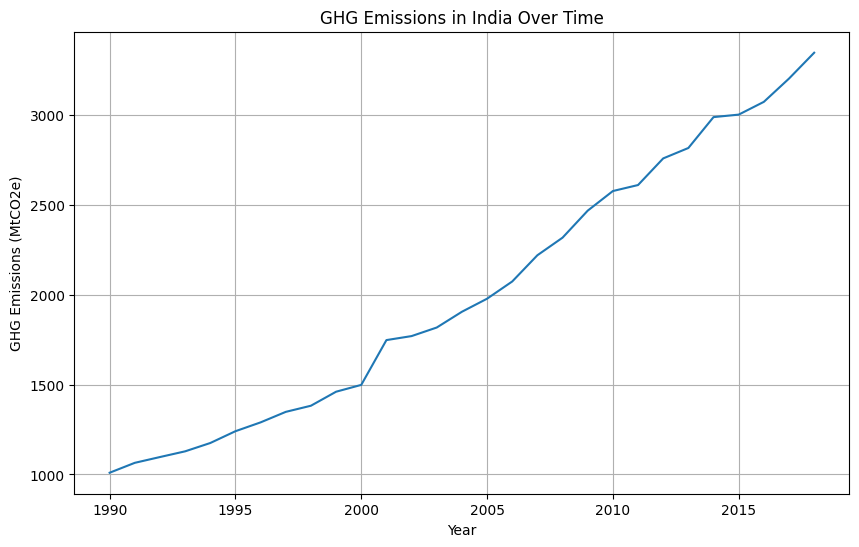


✅ Model Evaluation:
R² Score: 0.995
RMSE: 35.38


In [5]:
# STEP 1: Install openpyxl if needed (safe to skip for CSV)
!pip install openpyxl

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# STEP 3: Load the dataset
file_path = '/content/ghg-emissions.csv'  # Update if needed
df = pd.read_csv(file_path)

# STEP 4: Drop 'unit' column and reshape to long format
df = df.drop(columns=['unit'], errors='ignore')
df_long = df.melt(id_vars='Country/Region', var_name='Year', value_name='GHG Emissions')

# STEP 5: Clean data
df_long['Country/Region'] = df_long['Country/Region'].astype(str).str.strip()
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['GHG Emissions'] = pd.to_numeric(df_long['GHG Emissions'], errors='coerce')
df_long.dropna(inplace=True)

# STEP 6: Optional — visualize data for a specific country
country_to_plot = 'India'
country_data = df_long[df_long['Country/Region'] == country_to_plot]

if not country_data.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=country_data, x='Year', y='GHG Emissions')
    plt.title(f'GHG Emissions in {country_to_plot} Over Time')
    plt.xlabel('Year')
    plt.ylabel('GHG Emissions (MtCO2e)')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {country_to_plot}")

# STEP 7: Encode Country/Region
df_model = pd.get_dummies(df_long, columns=['Country/Region'], drop_first=True)

# STEP 8: Define features and target
X = df_model.drop(columns=['GHG Emissions'])
y = df_model['GHG Emissions']

# STEP 9: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 10: Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# STEP 11: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # fixed here

print(f"\n✅ Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


